# TEXT ANALYTICS

Movie-'Tu Jhoothi Main Makkaar'

The data is extracted from different websites like google, imdb and rotten tomatoes.The data was scraped from these websites using a scraper which goes by the name 'instant data scraper'.It is a plugin/extension which is available in google chrome.It extracted the reviews from these websites and converted those into a csv file which is further used to carry out analytics and processing on the textual data.

# 1.Data Extraction

In [204]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import os
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')

In [430]:
#pd.set_option('display.max_colwidth',50) #to display full text in a row
#pd.options.display.max_rows=None  #to display all rows

In [206]:
df1=pd.read_csv("C:\\Users\\dalal\\Downloads\\google.csv")
df1

,Reviews
0,It is a great movie you can enjoy with family ...
1,4/5 - Ranbir kapoor is made for these kinda ro...
2,Ignore these cringe south movie lover negative...
3,This is how movies should make you feel - “Ent...
4,"I loved watching Dimple Kapadiaji as Mom, she ..."
...,...
1433,Don't listen to the reviews. Should watch it. ...
1434,Watching this movie is such a TORTURE !! Peopl...
1435,The movie was a beautiful love letter to its g...
1436,Very emotional and really enjoyed. Message was...


In [207]:
df2=pd.read_csv("C:\\Users\\dalal\\Downloads\\imdb (6).csv")
df2

,Reviews
0,"""Tu Jhoothi Main Makkaar"" is a film that promi..."
1,"If this is entertaining or romantic, then I do..."
2,"Tu Jhoothi Main Makkar is two films in one, pr..."
3,Firstly the storyline shown in trailer is abso...
4,Again a bakwas content. Same again monkey bala...
...,...
2202,Hi please dont waste your time on this garbage...
2203,"Overall story was great, I really enjoyed the ..."
2204,First thing first what pulled me to cinema to ...
2205,"As all movies of luv ranjan, this one also fun..."


In [208]:
df3=pd.read_csv("C:\\Users\\dalal\\Downloads\\Google 2.csv")
df3

,Reviews
0,"""Tu Jhoothi Main Makkaar"" Review: A Disappoint..."
1,"Irrelevant, overacting & totally senseless - i..."
2,"Comedy hits, everything else misses"
3,Very weird all in all. Takes progress back atl...
4,Monkey balancing between feminism and family e...
...,...
2137,useless Movie and screenplay
2138,Green screen was so obvious and a lot of scene...
2139,Luv Ranjan and his way of presenting love from...
2140,For all romcom lovers


In [209]:
df=pd.concat([df2,df1,df3],axis=0).reset_index()
df.drop('index',axis=1,inplace=True)
df


,Reviews
0,"""Tu Jhoothi Main Makkaar"" is a film that promi..."
1,"If this is entertaining or romantic, then I do..."
2,"Tu Jhoothi Main Makkar is two films in one, pr..."
3,Firstly the storyline shown in trailer is abso...
4,Again a bakwas content. Same again monkey bala...
...,...
5782,useless Movie and screenplay
5783,Green screen was so obvious and a lot of scene...
5784,Luv Ranjan and his way of presenting love from...
5785,For all romcom lovers


df1,df2 and df3 contains all the reviews extracted from the websites.These dataframes are concatenated into a single dataframe df which is a combination of all the three dataframes.df is the dataframe which will be used to carry out the analysis further.

In [210]:
len(df)

5787

In [211]:
df

,Reviews
0,"""Tu Jhoothi Main Makkaar"" is a film that promi..."
1,"If this is entertaining or romantic, then I do..."
2,"Tu Jhoothi Main Makkar is two films in one, pr..."
3,Firstly the storyline shown in trailer is abso...
4,Again a bakwas content. Same again monkey bala...
...,...
5782,useless Movie and screenplay
5783,Green screen was so obvious and a lot of scene...
5784,Luv Ranjan and his way of presenting love from...
5785,For all romcom lovers


# 2.Text Wrangling and Pre-processing

In [213]:
!pip install spacy

Defaulting to user installation because normal site-packages is not writeable


In [214]:
import spacy #spacy uses nltk in the background 
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
import re
import unicodedata

Necessary libraries are imported which will help us in carrying out the analysis further.

In [215]:
nlp = spacy.load('en_core_web_sm')
nlp #spacy english has lot of useful functions for nlp processing

In [216]:
nltk.download('stopwords') #gives regular english stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dalal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [217]:
tokenizer=ToktokTokenizer()
stopword_list=nltk.corpus.stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')
#removed no and not from stopword list because we are going to remove stopwords and if we remove no and not it is going to 
#change the polarity and subjectivity of the sentence.

# Removing HTML tags

In [218]:
def strip_html_tags(text):
    soup=BeautifulSoup(text,"html.parser") #html parser is used to handle the html data scrapped from web
    stripped_text=soup.get_text()
    return stripped_text
strip_html_tags("<html><h2>Hello my name is Sumeet</h2></html>")

'Hello my name is Sumeet'

# Removing accented characters

In [219]:
def remove_accented_chars(text):
    text=unicodedata.normalize('NFKD',text).encode('ascii','ignore').decode('utf-8','ignore')
    return text
remove_accented_chars("Áccěnt") #nfkd means accented characters also we can use nfd,nfc and nfkc instead of nfkd
#first encodes the accented i.e nfkd chars using ascii and then to convert it into normal characters uses utf-8 decoding

'Accent'

# Removing special characters

In [220]:
def remove_special_characters(text,remove_digits=False):
    pattern=r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text=re.sub(pattern,'',text)
    return text
remove_special_characters("Hello! 'i' am Sumeet12345@!",remove_digits=True)
#re is regular expression
#pattern is the form in which we can find the text in our data so that regular expression recognizes it and removes
#those characters

'Hello i am Sumeet'

# Text lemmatization

In [221]:
def lemmatize_text(text):
    text=nlp(text)
    text=' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text
#PRON stands for PRONOUN
#lemma means the base or root word

In [222]:
lemmatize_text("My PC keeps on crashing regularly, also crashed the day before")

'my pc keep on crash regularly , also crash the day before'

# Text Stemming

In [223]:
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text=' '.join([ps.stem(word) for word in text.split()])
    return text

In [224]:
simple_stemmer("My PC keeps on crashing regularly, also crashed the day before")

'my pc keep on crash regularly, also crash the day befor'

In [426]:
#we can use both stemming and lemmatization or either one
#stemming doesnt work on parts of speech tagging but lemmatization works on parts of speech tagging
#stemming is faster and lemmatization is slower.

# Remove stopwords

In [226]:
def remove_stopwords(text,is_lower_case=False):
    tokens=tokenizer.tokenize(text)
    tokens=[token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens=[token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens=[token for token in tokens if token.lower() not in stopword_list]
    filtered_text=' '.join(filtered_tokens)
    return filtered_text

In [227]:
remove_stopwords("a,an,the are the stopwords and computer is not a stopword")

', , stopwords computer not stopword'

In [228]:
# toktok tokenizer converts sentence to words and strip removes any spaces between the characters

# Building a text normalizer

In [229]:
def normalized_corpus(corpus, html_stripping=True, contraction_expansion=True,
                     accented_char_removal=True, text_lower_case=True, 
                     text_lemmatization=True, special_char_removal=True, 
                     stopword_removal=True, remove_digits=True):
    
    normalized_corpus = []
    # normalize each document in the corpus
    for doc in corpus:
        # strip HTML
        if html_stripping:
            doc = strip_html_tags(doc)
        # remove accented characters
        if accented_char_removal:
            doc = remove_accented_chars(doc)
        # lowercase the text    
        if text_lower_case:
            doc = doc.lower()
        # remove extra newlines
        doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc)
        # lemmatize text
        if text_lemmatization:
            doc = lemmatize_text(doc)
        # remove special characters and\or digits    
        if special_char_removal:
            # insert spaces between special characters to isolate them    
            special_char_pattern = re.compile(r'([{.(-)!}])')
            doc = special_char_pattern.sub(" \\1 ", doc)
            doc = remove_special_characters(doc, remove_digits=remove_digits)  
        # remove extra whitespace
        doc = re.sub(' +', ' ', doc)
        # remove stopwords
        if stopword_removal:
            doc = remove_stopwords(doc, is_lower_case=text_lower_case)
            
        normalized_corpus.append(doc)
        
    return normalized_corpus

All the APIs or functions which we created above are combined into a normalized corpus defined function and then this function is applied on the data to get cleaned data.

# Preprocessing of data

In [231]:
df['clean_text']=normalized_corpus(df['Reviews'])
norm_corpus=list(df['clean_text'])

In [232]:
df.iloc[1][['Reviews','clean_text']].to_dict()

{'Reviews': "If this is entertaining or romantic, then I don't know where Manmarziyan, Tamasha or Laila Majnu would stand (classics - I guess). A bogus movie with bad acting (overacting). I was expecting layered nuances of modern day relationships & other modern day problems, instead got a mind numbing experience of overacting & pointless scene after scene. What's the purpose of our characters in this movie & why do they exist ? In which world do our characters live, no movie had Covid, no one ever faces competitive entrances, no one faces recession, no one ever has decent conversation over Coffee. Either they dance in slo mo after taking shots or they are sleeping together. Arey Idiots, world is different & beautiful, much more than silliness you guys project. Bollywood movies have lost it completely. May be someday better cinema with better actors will make more moolah at box office. Sorry guys totally wasted my time & money. Meanwhile, we wait for Oppenheimer.",
 'clean_text': 'ente

In [233]:
#df.to_csv('GroupM-TJMM',index=False,encoding='utf-8')

# Wordcloud

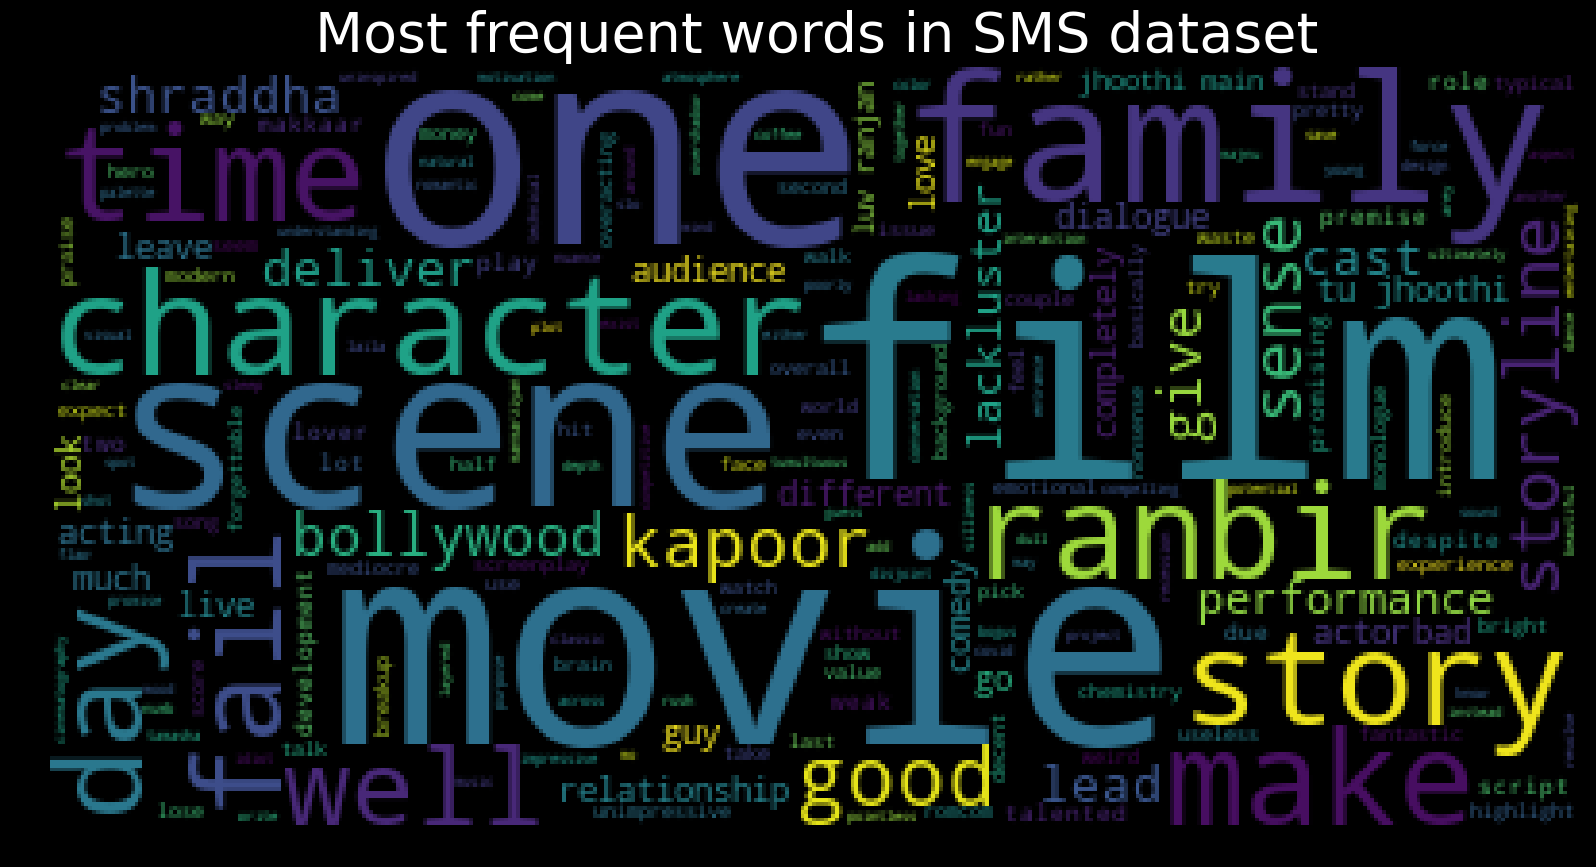

In [421]:
wc = WordCloud()
wc.generate(str(df['clean_text']))
plt.figure(figsize=(20,10), facecolor='k')
plt.title("Most frequent words in SMS dataset", fontsize=40,color='white')
plt.imshow(wc)
plt.show()

In [ ]:
#getting the most frequent words from the text and visualizing them

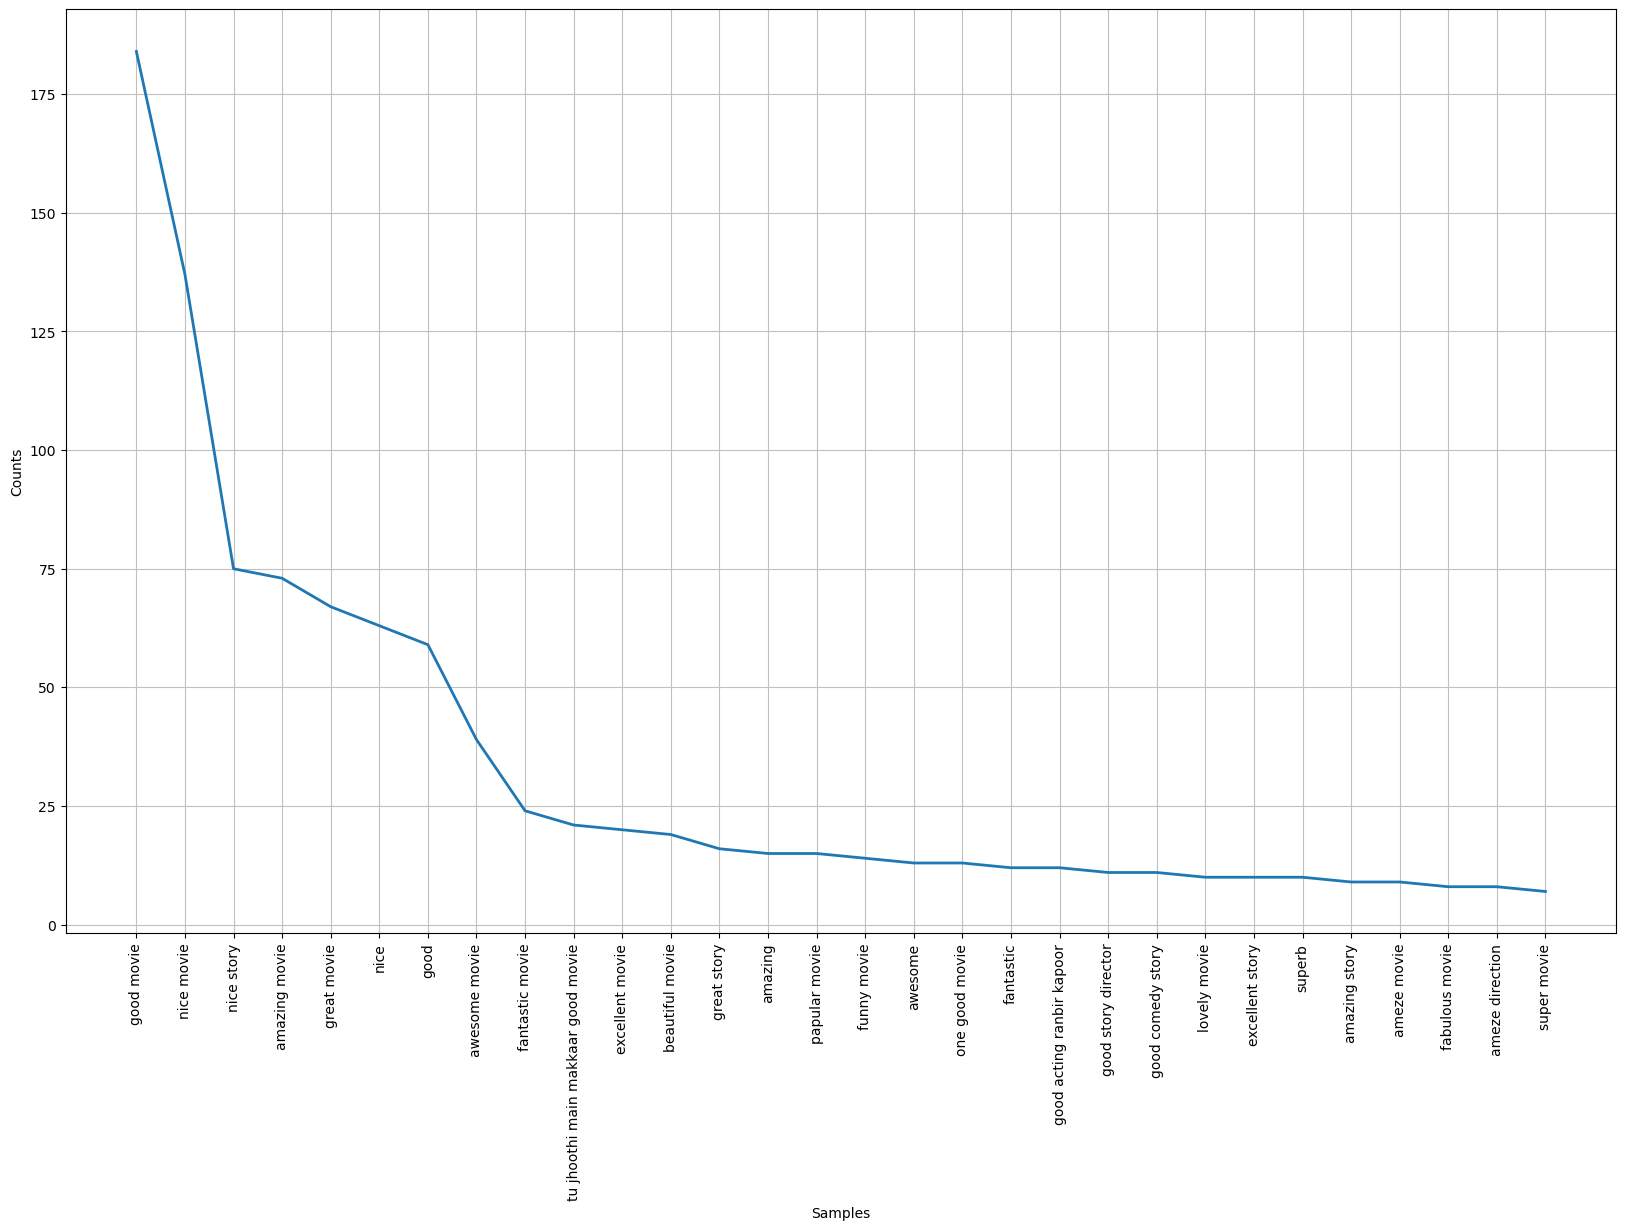

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [400]:
freq_dist = nltk.FreqDist(df['clean_text'])
#Frequency Distribution Plot
plt.subplots(figsize=(20,12))
freq_dist.plot(30)

In [424]:
mostcommon = freq_dist.most_common(15)
mostcommon

[('good movie', 184),
 ('nice movie', 137),
 ('nice story', 75),
 ('amazing movie', 73),
 ('great movie', 67),
 ('nice', 63),
 ('good', 59),
 ('awesome movie', 39),
 ('fantastic movie', 24),
 ('tu jhoothi main makkaar good movie', 21),
 ('excellent movie', 20),
 ('beautiful movie', 19),
 ('great story', 16),
 ('amazing', 15),
 ('papular movie', 15)]

Here we can see the most popular words or most frquent words in our text data.

# Tagging Parts of Speech

POS tagging can be done with the help of two methods

method 1:
Using Spacy

In [261]:
l1=[]
for i in range(5787):
    sentence=df['clean_text'].iloc[i]
    sentence_nlp=nlp(sentence)
    spacy_pos_tag=[(word,word.tag_,word.pos_) for word in sentence_nlp]
    l1.extend(spacy_pos_tag)   

In [264]:
m1=pd.DataFrame(l1,columns=['Word','POS tag','Tag type'])
m1

,Word,POS tag,Tag type
0,tu,NNP,PROPN
1,jhoothi,NNP,PROPN
2,main,JJ,ADJ
3,makkaar,NN,NOUN
4,film,NN,NOUN
...,...,...,...
202275,dailouge,NN,NOUN
202276,bollywood,NN,NOUN
202277,movie,NN,NOUN
202278,movie,NN,NOUN


In [ ]:
#POS tag is the short form of tag type.

Method 2
Using NLTK

In [186]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dalal\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [187]:
nltk.download('maxent_treebank_pos_tagger')

[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     C:\Users\dalal\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\maxent_treebank_pos_tagger.zip.


True

In [192]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\dalal\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [265]:
nltk_pos_tag=nltk.pos_tag(sentence.split())

In [267]:
l2=[]
for i in range(5787):
    sentence=df['clean_text'].iloc[i]
    nltk_pos_tag=nltk.pos_tag(sentence.split())
    l2.extend(nltk_pos_tag)   

In [268]:
m2=pd.DataFrame(l2,columns=['Word','POS tag'])
m2

,Word,POS tag
0,tu,NN
1,jhoothi,NN
2,main,JJ
3,makkaar,NN
4,film,NN
...,...,...
202264,dailouge,NN
202265,bollywood,NN
202266,movie,NN
202267,movie,NN


Visualizing the count of parts of speech in the data

In [274]:
m1['Tag type'].value_counts().to_frame().T

,NOUN,ADJ,VERB,PROPN,ADV,PRON,AUX,PART,ADP,NUM,DET,SCONJ,INTJ,CCONJ,X,PUNCT,SYM
Tag type,84688,37621,29631,19474,12066,7079,2239,2204,1919,1687,1401,1198,775,220,70,6,2


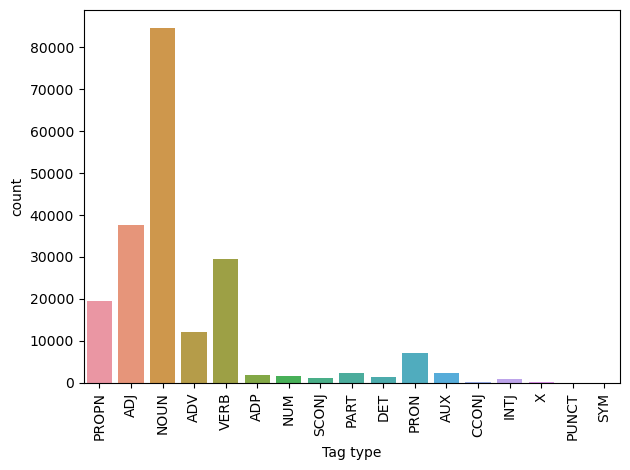

In [275]:
sns.countplot(m1['Tag type'])
plt.xticks(rotation=90)
plt.tight_layout()

From the above count plot it is clearly visible that Noun is the part of speech which has appeared the most in our textual data.It is followed by other parts of speech like Adjective,Verb and so on.

# Named Entity Recognition

In [277]:
sentence=df['clean_text'].iloc[0]

In [278]:
sentence_nlp=nlp(sentence)
sentence_nlp

tu jhoothi main makkaar film promise lot talented cast ultimately fail deliver compelling storyline ranbir kapoor shraddha kapoor play lead role movie performance overshadow lackluster script film revolve around story two young lover tumultuous relationship despite promising premise plot fail engage audience due weak character development unimpressive screenplay story feels rush disjoint audience leave without clear understanding motivation characters acting ranbir kapoor shraddha kapoor one bright spot film however even impressive performance not save movie flaw chemistry lead actor lacking interaction come across force rather natural another issue film lackluster visual sound design cinematography dull color palette uninspired fail create sense atmosphere mood dialogue poorly write time make no sense music background score forgettable fail add emotional depth story overall tu jhoothi main makkaar mediocre movie fail live potential talented cast despite promising premise film weak scr

In [279]:
print([(word,word.ent_type_) for word in sentence_nlp if word.ent_type_])

[(tu, 'PERSON'), (kapoor, 'GPE'), (two, 'CARDINAL'), (kapoor, 'GPE'), (one, 'CARDINAL')]


In [298]:
named_entities = []
for sentence in df['clean_text']:
    temp_entity_name = ''
    temp_named_entity = None
    sentence = nlp(sentence)
    for word in sentence:
        term = word.text 
        tag = word.ent_type_
        if tag:
            temp_entity_name = ' '.join([temp_entity_name, term]).strip()
            temp_named_entity = (temp_entity_name, tag)
        else:
            if temp_named_entity:
                named_entities.append(temp_named_entity)
                temp_entity_name = ''
                temp_named_entity = None

entity_frame = pd.DataFrame(named_entities, 
                            columns=['Entity Name', 'Entity Type'])

In [299]:
entity_frame

,Entity Name,Entity Type
0,tu,PERSON
1,kapoor,GPE
2,two,CARDINAL
3,kapoor,GPE
4,one,CARDINAL
...,...,...
5758,one,CARDINAL
5759,one,CARDINAL
5760,luv ranjan,PERSON
5761,one,CARDINAL


In [320]:
top_entities = entity_frame.groupby(by=['Entity Name', 'Entity Type']).size().sort_values(ascending=False).reset_index().rename(columns={0 : 'Frequency'})
top_entities

,Entity Name,Entity Type,Frequency
0,kapoor,GPE,649
1,one,CARDINAL,617
2,three year,DATE,425
3,anjaana anjaani bachna,ORG,374
4,singh bassi,PERSON,349
...,...,...,...
760,haseeno young guy ranbir,ORG,1
761,haseeno young ranbir kapoor,ORG,1
762,haseeno young star,PERSON,1
763,haseenopart ranbir,ORG,1


In [ ]:
#value_counts() and to_frame() can be used instead of size()

In [333]:
q=entity_frame.groupby('Entity Type').count().rename(columns={'Entity Name':'Frequency'})
q

,Frequency
Entity Type,
CARDINAL,978
DATE,772
FAC,17
GPE,791
LAW,33
...,...
ORG,1090
PERSON,1590
PRODUCT,2


Visualizing the most frequent entities in the data

<AxesSubplot:xlabel='Entity Type'>

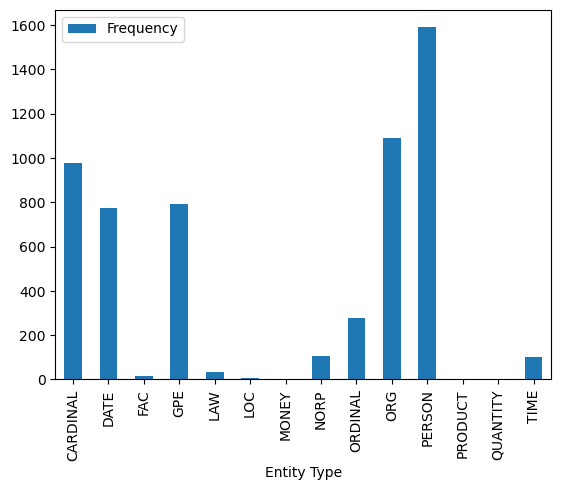

In [338]:
q.plot(kind='bar')

Here we can see that PERSON is the entity type which has appeared the most in our textual data.It is followed by other entities like ORG,CARDINAL and so on.

# Sentiment Analysis 

Sentiment Analysis on textual data can be performed using two methods 1.Afinn and 2.TextBlob

Method 1-Using Afinn

In [339]:
!pip install afinn

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 52.6/52.6 kB 672.2 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53431 sha256=c09aa27931821bb1d795f10c334db6d99bd2d787e5c1b1c6efda9b30c10b877b
  Stored in directory: c:\users\dalal\appdata\local\pip\cache\wheels\79\91\ee\8374d9bc8c6c0896a2db75afdfd63d43653902407a0e76cd94
Successfully built afinn


In [340]:
from afinn import Afinn

In [342]:
af=Afinn()

In [344]:
sentiment_scores=[af.score(article) for article in df['clean_text']]

In [346]:
sentiment_category=['Positive' if score>0 else 'Negative' if score<0 else 'Neutral' for score in sentiment_scores]

In [349]:
df1=df.copy()

In [351]:
df1['Sentiment score Afinn']=sentiment_scores
df1['Sentiment category Afinn']=sentiment_category

In [352]:
df1

,Reviews,clean_text,Sentiment score Afinn,Sentiment category Afinn
0,"""Tu Jhoothi Main Makkaar"" is a film that promi...",tu jhoothi main makkaar film promise lot talen...,-15.0,Negative
1,"If this is entertaining or romantic, then I do...",entertaining romantic I not know manmarziyan t...,-12.0,Negative
2,"Tu Jhoothi Main Makkar is two films in one, pr...",tu jhoothi main makkar two film one promote th...,50.0,Positive
3,Firstly the storyline shown in trailer is abso...,firstly storyline show trailer absolutely fals...,7.0,Positive
4,Again a bakwas content. Same again monkey bala...,bakwas content monkey balance b w poisonous fe...,0.0,Neutral
...,...,...,...,...
5782,useless Movie and screenplay,useless movie screenplay,-2.0,Negative
5783,Green screen was so obvious and a lot of scene...,green screen obvious lot scene look fake,-3.0,Negative
5784,Luv Ranjan and his way of presenting love from...,luv ranjan way present love different viewpoint,3.0,Positive
5785,For all romcom lovers,romcom lover,0.0,Neutral


In [356]:
df1['Sentiment category Afinn'].value_counts(normalize=True)*100

Positive    89.649214
Neutral      5.961638
Negative     4.389148
Name: Sentiment category Afinn, dtype: float64

<AxesSubplot:xlabel='Sentiment category Afinn', ylabel='count'>

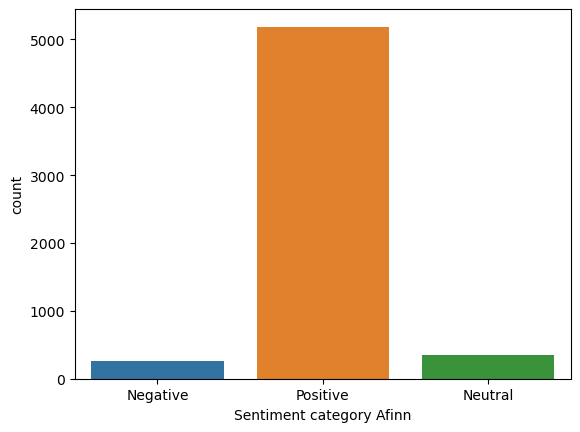

In [353]:
sns.countplot(df1['Sentiment category Afinn'])

We can see from the above graph that most of the reviews which the movie has received are Positive followed by Neutral and Negative.

In [ ]:
#example of a negative sentiment review

In [377]:
df1[df1['Sentiment score Afinn']==-18].iloc[0].to_frame()

,221
Reviews,The movie gives a WRONG MESSAGE in all possible ways. It fails to entertain in the last 1 hour and it's a complete torture sitting through the last 1 hour of the movie.The movie stops making any kind of sense in the Second half. The message is to separate from joint families because the girl is lying to break up. So the girl is not at fault for lying. Whatttttttt?? Seriously.The guy is still running after the girl even after knowing she cheated on him. Seriously again..Only the guys family has been concentrated upon. Nothing has been shown from the girls family side.Also the acting is as horrible as it gets. The supporting caste barring Dimple is horrible. Even the lead paid overacts all the time including the worst being Bassi.
clean_text,movie give wrong message possible way fail entertain last hour complete torture sit last hour movie movie stop make kind sense second half message separate joint family girl lie break girl not fault lie whatttttttt seriously guy still run girl even know cheat seriously guy family concentrate upon nothing show girl family side also acting horrible get support caste bar dimple horrible even lead pay overact time include bad bassi
Sentiment score Afinn,-18.0
Sentiment category Afinn,Negative


In [ ]:
#example of a positive sentiment review

In [376]:
df1[df1['Sentiment score Afinn']==+50].iloc[0].to_frame()

,2
Reviews,"Tu Jhoothi Main Makkar is two films in one, promoted as a third completely different one altogether. You walk in expecting a typical Luv Ranjan film with the twist of both of its lead characters being anti-heroes but get confronted by a Rab Ne Bana Di Jodi-esque love story coupled with family drama.The film shines the brightest during its comedy scenes (the FRIENDS finale inspired family banter in the car is the highlight of the film). The meta jokes land well. Bassi delivers one-liners like he did when he was at his peak as a standup comedian and while his own subplot in the film makes no sense, he chews whatever bite he's given well. The child actor, Inayat Verma, is the definition of chhota packet bada dhamaka. She plays her character with such ease and brilliance and hits both the punchlines and the slapstick comedy with such perfection, I became a fan. The supporting cast in general is fantastic. Shraddha, as always, looks gorgeous in the film and performs fairly until her shortcomings in the acting department get highlighted in scenes where she has to deliver purely through her expressions. This isn't anywhere close to Ranbir's best performance, in fact he puts his acting skills on the backburner, but apart from some scenes where he unnaturally breaks the fourth wall due to the director's insistence, he does fit in well.The film, however, tests your patience in emotional scenes in the second half, completely losing both its tonality and crowd pull. Attempts at using songs to pick up pace and audience interest fall flat in the last hour. The film picked up a pretty relevant topic in the second half but chose a convenient way out of it. I would've preferred the realistic ending they were going for until the U-turn that they took in the last 30 minutes but that wouldn't have had the commercial appeal that is needed to carry Bollywood films to the Hit verdict these days. The background score of the film is fantastic and it does have some catchy chartbusters too but it has one too many songs for its own good. The direction is pretty mediocre as is the writing but I walked in leaving my brain in the fridge at home so I was able to look past that.Overall, the film is a decent one-time watch constructed calculatively to make it flow with the masses and even if you aren't one of them you could enjoy it for its comedy."
clean_text,tu jhoothi main makkar two film one promote third completely different one altogether walk expect typical luv ranjan film twist lead character anti hero get confront rab ne bana di jodi esque love story couple family drama film shine bright comedy scene friend finale inspire family banter car highlight film meta joke land well bassi deliver one liner like peak standup comedian subplot film make no sense chew whatever bite give well child actor inayat verma definition chhota packet bada dhamaka play character ease brilliance hit punchline slapstick comedy perfection I become fan support cast general fantastic shraddha always look gorgeous film perform fairly shortcoming act department get highlight scene deliver purely expression not anywhere close ranbir good performance fact put acting skill backburner apart scene unnaturally break fourth wall due director insistence fit well film however test patience emotional scene second half completely lose tonality crowd pull attempt use song pick pace audience interest fall flat last hour film pick pretty relevant topic second half choose convenient way I would prefer realistic ending go u turn take last minute would not commercial appeal need carry bollywood film hit verdict day background score film fantastic catchy chartbuster one many song good direction pretty mediocre writing I walk leave brain fridge home I able look past overall film decent one time watch construct calculatively make flow masse even not one could enjoy comedy
Sentiment score Afinn,50.0
Sentiment category Afinn,Positive


In [ ]:
#example of a neutral sentiment review

In [380]:
df1[df1['Sentiment score Afinn']==0].iloc[3].to_frame()

,258
Reviews,"Completely baseless movie with a negative social message. Absurd Storyline.In today's context, where the flavors of joint family is missing, this movie is advocating somehow, the selfish intent to promote nuclear family.Except few funny moments, this movie has absolutely nothing more to offer.Overall acting from the star sons and star daughters is equally disappointing. Another reason to avoid Bollywood movie in the future...\nIt's the high time that Bollywood look for some good storyline, good acting and good direction.I would prefer to watch again some good movie, one more time, rather than wasting the time for these hopeless and torturing movies."
clean_text,completely baseless movie negative social message absurd storyline today context flavor joint family miss movie advocate somehow selfish intent promote nuclear family except funny moment movie absolutely nothing offer overall act star son star daughter equally disappointing another reason avoid bollywood movie future high time bollywood look good storyline good acting good direction would prefer watch good movie one time rather waste time hopeless torture movie
Sentiment score Afinn,0.0
Sentiment category Afinn,Neutral


Method 2-Using Textblob

In [381]:
from textblob import TextBlob

In [386]:
sentiment_score_tb=[round(TextBlob(article).sentiment.polarity,3) for article in df['clean_text']]

In [384]:
sentiment_category_tb=['Positive' if score>0 else 'Negative' if score<0 else 'Neutral' for score in sentiment_score_tb]

In [389]:
df1['Sentiment score TextBlob']=sentiment_score_tb
df1['Sentiment category TextBlob']=sentiment_category_tb

In [431]:
df1

,Reviews,clean_text,Sentiment score Afinn,Sentiment category Afinn,Sentiment score TextBlob,Sentiment category TextBlob
0,"""Tu Jhoothi Main Makkaar"" is a film that promi...",tu jhoothi main makkaar film promise lot talen...,-15.0,Negative,-0.032,Negative
1,"If this is entertaining or romantic, then I do...",entertaining romantic I not know manmarziyan t...,-12.0,Negative,-0.029,Negative
2,"Tu Jhoothi Main Makkar is two films in one, pr...",tu jhoothi main makkar two film one promote th...,50.0,Positive,0.179,Positive
3,Firstly the storyline shown in trailer is abso...,firstly storyline show trailer absolutely fals...,7.0,Positive,-0.031,Negative
4,Again a bakwas content. Same again monkey bala...,bakwas content monkey balance b w poisonous fe...,0.0,Neutral,0.147,Positive
...,...,...,...,...,...,...
5782,useless Movie and screenplay,useless movie screenplay,-2.0,Negative,-0.500,Negative
5783,Green screen was so obvious and a lot of scene...,green screen obvious lot scene look fake,-3.0,Negative,-0.233,Negative
5784,Luv Ranjan and his way of presenting love from...,luv ranjan way present love different viewpoint,3.0,Positive,0.167,Positive
5785,For all romcom lovers,romcom lover,0.0,Neutral,0.000,Neutral


In [391]:
df1['Sentiment category TextBlob'].value_counts(normalize=True)*100

Positive    89.320892
Neutral      5.978918
Negative     4.700190
Name: Sentiment category TextBlob, dtype: float64

<AxesSubplot:xlabel='Sentiment category TextBlob', ylabel='count'>

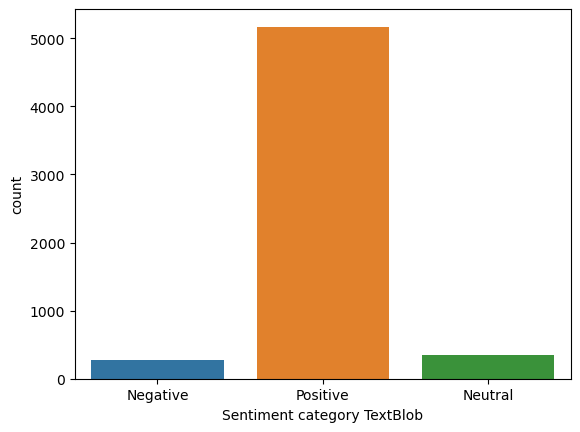

In [392]:
sns.countplot(df1['Sentiment category TextBlob'])

We can see from the above graph that most of the reviews which the movie has received are Positive followed by Neutral and Negative.

In [ ]:
#example of a positive review

In [393]:
df1[df1['Sentiment score TextBlob']>0.5].iloc[0].to_frame()

,58
Reviews,"A fantastic cast and a fantastic script by Luv Ranjan and Rahul Mody. Ranbir and Shraddha Kapoor are the best choices for this job. Even without a fresh version, Ranbir and Shraddha have incredible chemistry, and the songs are fantastic. The notion is quite novel, with humor and a family film thrown in for good measure. This film deserves to be praised for its romance and wit. And YESS SHRADDHA'S RETURN AFTER THREE YEARS, the girl's dancing steals the stage, and Ranbir is the perfect pick. The Shraddha Ranbir Chemistry uff on top of Bassi's best acting was achieved. Paisa Vasul is a film. I adore this film, and it is flawless in every way."
clean_text,fantastic cast fantastic script luv ranjan rahul mody ranbir shraddha kapoor good choice job even without fresh version ranbir shraddha incredible chemistry song fantastic notion quite novel humor family film throw good measure film deserve praise romance wit yess shraddha return three year girl dancing steal stage ranbir perfect pick shraddha ranbir chemistry uff top bassi good acting achieve paisa vasul film I adore film flawless every way
Sentiment score Afinn,39.0
Sentiment category Afinn,Positive
Sentiment score TextBlob,0.583
Sentiment category TextBlob,Positive


In [ ]:
#example of a negative review

In [396]:
df1[df1['Sentiment score TextBlob']<-0.5].iloc[2].to_frame()

,2506
Reviews,"Just came here to see the reviews (after watching movie) and was shocked to see some people have given 5 stars. \n\nI have'nt seen more rediculous movie in my entire life. Film is maha boring, over streached, bad editing. \n\n2+ hours of my life got wasted while watching it. \n\nIt deserves 0 stars."
clean_text,come see review watch movie shocked see people give star I havent see rediculous movie entire life film maha boring streache bad editing hour life got waste watch deserve star
Sentiment score Afinn,-9.0
Sentiment category Afinn,Negative
Sentiment score TextBlob,-0.52
Sentiment category TextBlob,Negative


In [ ]:
#example of a neutral review

In [398]:
df1[df1['Sentiment score TextBlob']==0].iloc[-1].to_frame()

,5785
Reviews,For all romcom lovers
clean_text,romcom lover
Sentiment score Afinn,0.0
Sentiment category Afinn,Neutral
Sentiment score TextBlob,0.0
Sentiment category TextBlob,Neutral


# Conclusion:- From the textblob sentimental analysis we can conclude that 89.32% of the reviews which the movie received are positive,5.97% are neutral and 4.7% reviews are negative.Hence the overall response which the movie has received from the audience is positive.
# The analytics conducted in this project matches the actual ratings of the movie received from the audience.